In [1]:
import pandas as pd #data manipulation
import numpy as np #calculus and algebra
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import stats
#copied

In [2]:
passenger_movement_df = pd.read_csv('TRBM1.20240317134742.csv')
#copied

Exploring the data set

In [3]:
passenger_movement_df.head(30) #Displaying first 30 rows (Cork airport only opened in 1961)
#Issue with the TLIST(M1) - the months need to
#be turned into decimal form
#copied

,STATISTIC,STATISTIC Label,TLIST(M1),Month,DIRECT,Direction,TYPASS,Type of Passenger Movement,UNIT,VALUE
0,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,1,Passenger Movement by Sea to All Countries,Number,20102.0
1,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,11,Passenger Movement by Sea to Great Britain,Number,19963.0
2,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,12,Passenger Movement by Sea to Countries Other T...,Number,139.0
3,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,2,Passenger Movement Cross-Border Rail,Number,10344.0
4,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,3,Passenger Movement Cross-Border Bus,Number,40063.0
5,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,4,Passenger Movement by Air from All Airports,Number,18098.0
6,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,41,Passenger Movement by Air from Dublin Airport,Number,16762.0
7,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,42,Passenger Movement by Air from Cork Airport,Number,0.0
8,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,43,Passenger Movement by Air from Shannon Airport,Number,1336.0
9,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,431,Passenger Movement by Air from Shannon Airport...,Number,747.0


In [4]:
passenger_movement_df.shape
#copied

(12936, 10)

In [5]:
#Renaming columns intuitively
passenger_movement_df = passenger_movement_df.rename(columns={'TLIST(M1)': 'Year' })
#copied

In [6]:
#Checking for duplicates
duplicate_rows_df = passenger_movement_df[passenger_movement_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
#no duplicated data
#copied

number of duplicate rows:  (0, 10)


In [7]:
passenger_movement_df.count() 
#copied

STATISTIC                     12936
STATISTIC Label               12936
Year                          12936
Month                         12936
DIRECT                        12936
Direction                     12936
TYPASS                        12936
Type of Passenger Movement    12936
UNIT                          12936
VALUE                         12934
dtype: int64

In [8]:
passenger_movement_df.dtypes
#copied

STATISTIC                      object
STATISTIC Label                object
Year                            int64
Month                          object
DIRECT                          int64
Direction                      object
TYPASS                          int64
Type of Passenger Movement     object
UNIT                           object
VALUE                         float64
dtype: object

In [9]:
passenger_movement_df = passenger_movement_df.drop(["STATISTIC Label", "TYPASS", "UNIT", "DIRECT", "STATISTIC","Month"], axis=1)
#removing columns which aren't needed/are duplicated
#going to keep the two year-month columns as the original form will be used later on in ML section
#copied

In [10]:
ascending_passenger_movement_df = passenger_movement_df.sort_values(by='VALUE', ascending=False)
ascending_passenger_movement_df
#copied

,Year,Direction,Type of Passenger Movement,VALUE
12567,200808,Arriving in Eire,Passenger Movement by Air from All Airports,1603381.0
12303,200708,Arriving in Eire,Passenger Movement by Air from All Airports,1575955.0
12281,200707,Arriving in Eire,Passenger Movement by Air from All Airports,1565640.0
12545,200807,Arriving in Eire,Passenger Movement by Air from All Airports,1555437.0
12292,200707,Departing Eire,Passenger Movement by Air from All Airports,1555235.0
...,...,...,...,...
161,196108,Arriving in Eire,Passenger Movement by Air from Cork Airport,0.0
2675,197102,Departing Eire,Passenger Movement by Sea to Countries Other T...,0.0
2631,197012,Departing Eire,Passenger Movement by Sea to Countries Other T...,0.0
12126,200612,Arriving in Eire,Passenger Movement Cross-Border Bus,NaN


In [11]:
#function to convert imported year to a decimal
def year_month_to_decimal(year_month):
    
    year = int(year_month[:4])
    month = int(year_month[4:])
    decimal_month = month / 12.0
    return year + decimal_month
#copied

In [12]:
passenger_movement_df['Year'] = passenger_movement_df['Year'].astype(str)
passenger_movement_df['decimal_year'] = passenger_movement_df['Year'].apply(year_month_to_decimal)
passenger_movement_df['decimal_year'] = passenger_movement_df['decimal_year'].astype(float)
passenger_movement_df
#applying the function to the year 
#copied

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year
0,196101,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333
1,196101,Arriving in Eire,Passenger Movement by Sea to Great Britain,19963.0,1961.083333
2,196101,Arriving in Eire,Passenger Movement by Sea to Countries Other T...,139.0,1961.083333
3,196101,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333
4,196101,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333
...,...,...,...,...,...
12931,200912,Departing Eire,Passenger Movement by Air from Dublin Airport,664962.0,2010.000000
12932,200912,Departing Eire,Passenger Movement by Air from Cork Airport,76086.0,2010.000000
12933,200912,Departing Eire,Passenger Movement by Air from Shannon Airport,61229.0,2010.000000
12934,200912,Departing Eire,Passenger Movement by Air from Shannon Airport...,50767.0,2010.000000


In [13]:
passenger_movement_df.head(20)

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year
0,196101,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333
1,196101,Arriving in Eire,Passenger Movement by Sea to Great Britain,19963.0,1961.083333
2,196101,Arriving in Eire,Passenger Movement by Sea to Countries Other T...,139.0,1961.083333
3,196101,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333
4,196101,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333
5,196101,Arriving in Eire,Passenger Movement by Air from All Airports,18098.0,1961.083333
6,196101,Arriving in Eire,Passenger Movement by Air from Dublin Airport,16762.0,1961.083333
7,196101,Arriving in Eire,Passenger Movement by Air from Cork Airport,0.0,1961.083333
8,196101,Arriving in Eire,Passenger Movement by Air from Shannon Airport,1336.0,1961.083333
9,196101,Arriving in Eire,Passenger Movement by Air from Shannon Airport...,747.0,1961.083333


In [14]:
passenger_movement_df.shape #12936 rows of data, 10 columns

(12936, 5)

In [15]:
passenger_movement_df.info() #two values missing
#copied

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12936 entries, 0 to 12935
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        12936 non-null  object 
 1   Direction                   12936 non-null  object 
 2   Type of Passenger Movement  12936 non-null  object 
 3   VALUE                       12934 non-null  float64
 4   decimal_year                12936 non-null  float64
dtypes: float64(2), object(3)
memory usage: 505.4+ KB


In [16]:
print(passenger_movement_df.isnull().values.any())
#copied

True


In [17]:
print(passenger_movement_df.isnull().sum())
#copied

Year                          0
Direction                     0
Type of Passenger Movement    0
VALUE                         2
decimal_year                  0
dtype: int64


In [18]:
#Since the number of rows with null values is very small compared to the whole data set, the rows will be removed
passenger_movement_df.dropna(axis=0,inplace=True) 
#copied

In [19]:
passenger_movement_df.shape #two rows have been deleted from the original dataset
#copied

(12934, 5)

In [20]:
def season(x):
    month = int(str(x)[-2:])
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
passenger_movement_df['Season'] =  passenger_movement_df['Year'].apply(season)

In [21]:
#Splitting data into two data frames: arriving into Ireland and departing from Ireland, making sure to not double count
arriving_df = passenger_movement_df[passenger_movement_df['Direction'].isin(['Arriving in Eire'])]
options =['Passenger Movement by Sea to All Countries', 'Passenger Movement Cross-Border Rail', 'Passenger Movement Cross-Border Bus', 'Passenger Movement by Air from All Airports']
arriving_net_df = arriving_df[arriving_df['Type of Passenger Movement'].isin(options)]
departing_df = passenger_movement_df[passenger_movement_df['Direction'].isin(['Departing Eire'])]
departing_net_df = departing_df[departing_df['Type of Passenger Movement'].isin(options)]
departing_by_sea_df = departing_net_df[departing_df['Type of Passenger Movement'].isin(['Passenger Movement by Sea to All Countries'])]

passenger_movement_net_df = passenger_movement_df[passenger_movement_df['Type of Passenger Movement'].isin(options)]
departing_by_sea_summer_df = departing_by_sea_df[departing_by_sea_df['Season'].str.contains('Summer')]
arriving_by_air_df = arriving_net_df[arriving_df['Type of Passenger Movement'].isin(['Passenger Movement by Air from All Airports'])]  
arriving_by_sea_df = arriving_net_df[arriving_df['Type of Passenger Movement'].isin(['Passenger Movement by Sea to All Countries'])]
departing_by_air_df = departing_net_df[departing_df['Type of Passenger Movement'].isin(['Passenger Movement by Air from All Airports'])]
#Make this into a for loop
#For comparison of methods of entering the country
#copied

/var/folders/b_/lhys_mf5099_jpmljbxkw9ww0000gn/T/ipykernel_58629/57287361.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  departing_by_sea_df = departing_net_df[departing_df['Type of Passenger Movement'].isin(['Passenger Movement by Sea to All Countries'])]
/var/folders/b_/lhys_mf5099_jpmljbxkw9ww0000gn/T/ipykernel_58629/57287361.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arriving_by_air_df = arriving_net_df[arriving_df['Type of Passenger Movement'].isin(['Passenger Movement by Air from All Airports'])]
/var/folders/b_/lhys_mf5099_jpmljbxkw9ww0000gn/T/ipykernel_58629/57287361.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arriving_by_sea_df = arriving_net_df[arriving_df['Type of Passenger Movement'].isin(['Passenger Movement by Sea to All Countries'])]
/var/folders/b_/lhys_mf5099_jpmljbxkw9ww0000gn/T/ipykernel_58629/57287361.py:13: UserWarning: Boolean Series key will be 

In [22]:
passenger_movement_net_df.describe() #TLIST is the time so not really relevant here
#copied

,VALUE,decimal_year
count,4.702000e+03,4702.000000
mean,1.302282e+05,1985.532539
std,2.245016e+05,14.142647
min,4.815000e+03,1961.083333
25%,2.872375e+04,1973.270833
50%,4.420000e+04,1985.500000
75%,1.245878e+05,1997.750000
max,1.603381e+06,2010.000000


In [23]:
passenger_movement_net_df.describe(include="object")
#copied

,Year,Direction,Type of Passenger Movement,Season
count,4702,4702,4702,4702
unique,588,2,4,4
top,196101,Arriving in Eire,Passenger Movement by Sea to All Countries,Spring
freq,8,2351,1176,1176


In [24]:
passenger_movement_df["Direction"].unique()
#copired

array(['Arriving in Eire', 'Departing Eire'], dtype=object)

In [25]:
passenger_movement_df["Type of Passenger Movement"].unique()
#copied

array(['Passenger Movement by Sea to All Countries',
       'Passenger Movement by Sea to Great Britain',
       'Passenger Movement by Sea to Countries Other Than Great Britain',
       'Passenger Movement Cross-Border Rail',
       'Passenger Movement Cross-Border Bus',
       'Passenger Movement by Air from All Airports',
       'Passenger Movement by Air from Dublin Airport',
       'Passenger Movement by Air from Cork Airport',
       'Passenger Movement by Air from Shannon Airport',
       'Passenger Movement by Air from Shannon Airport (Eastbound)',
       'Passenger Movement by Air from Shannon Airport (Westbound)'],
      dtype=object)

# Want to use a for loop to automate the splitting of the dataframes

In [26]:
departing_net_df.head(20)

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
11,196101,Departing Eire,Passenger Movement by Sea to All Countries,44076.0,1961.083333,Winter
14,196101,Departing Eire,Passenger Movement Cross-Border Rail,9967.0,1961.083333,Winter
15,196101,Departing Eire,Passenger Movement Cross-Border Bus,40137.0,1961.083333,Winter
16,196101,Departing Eire,Passenger Movement by Air from All Airports,27496.0,1961.083333,Winter
33,196102,Departing Eire,Passenger Movement by Sea to All Countries,22006.0,1961.166667,Winter
36,196102,Departing Eire,Passenger Movement Cross-Border Rail,9944.0,1961.166667,Winter
37,196102,Departing Eire,Passenger Movement Cross-Border Bus,36091.0,1961.166667,Winter
38,196102,Departing Eire,Passenger Movement by Air from All Airports,18533.0,1961.166667,Winter
55,196103,Departing Eire,Passenger Movement by Sea to All Countries,27749.0,1961.250000,Spring
58,196103,Departing Eire,Passenger Movement Cross-Border Rail,16116.0,1961.250000,Spring


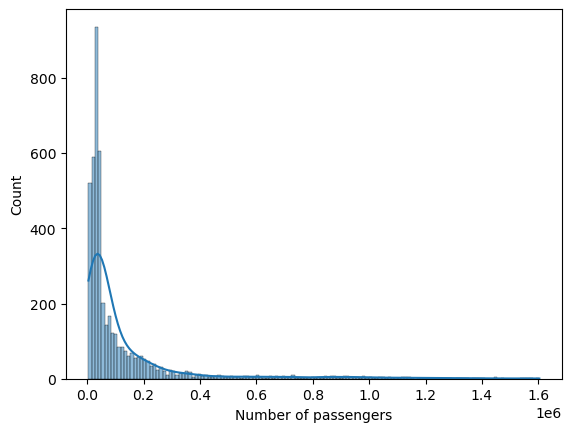

In [27]:
sns.histplot(data=passenger_movement_net_df, x="VALUE", kde = True)
plt.xlabel('Number of passengers')
plt.ylabel('Count')
plt.savefig('hist')
#copied

Text(0.5, 1.0, 'Boxplot')

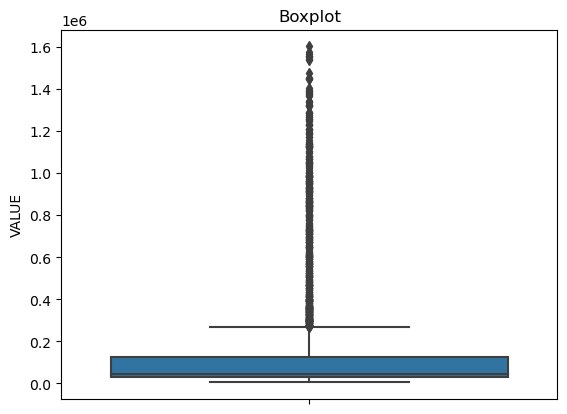

In [28]:
sns.boxplot(y = 'VALUE', data = passenger_movement_net_df) #numbers arriving by sea have remained very stable over the years - presents better on the boxplot, too much variance otherwise
plt.title('Boxplot')
#copied

<Axes: xlabel='VALUE', ylabel='Count'>

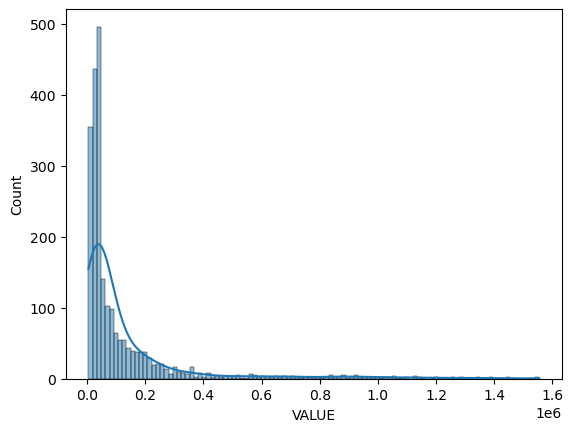

In [29]:
sns.histplot(data=departing_net_df, x="VALUE", kde = True) #why are there white lines?
#arriving_df["decimal_year"] = pd.to_datetime(arriving_df["decimal_year"], format='%Y.%f')
#arriving_df["sum_year"] = pd.to_datetime(arriving_df["decimal_year"], format='%Y', errors='coerce') + pd.to_timedelta((arriving_df['decimal_year'] - arriving_df['decimal_year'].astype(int)) * 365.25, unit='D')

# Group by year and sum the values in the specified column
#sum_for_year = arriving_df.groupby(arriving_df['VALUE'].dt.year)['VALUE'].sum().reset_index()

# Create a Seaborn bar plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='sum_year', y='VALUE', data=yearly_totals)
# plt.xlabel('Year')
# plt.ylabel('Sum of Values')
# plt.title('Sum of Values by Year')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
# #need to check about how to plot histogram properly
#copied

# Normal Distribution

<Axes: xlabel='VALUE', ylabel='Count'>

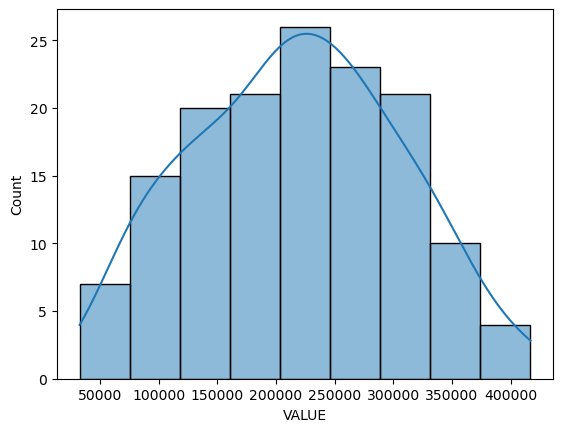

In [30]:
departing_by_sea_summer_df = departing_by_sea_df[departing_by_sea_df['Season'].str.contains('Summer')]
sns.histplot(data=departing_by_sea_summer_df, x="VALUE", kde = True)

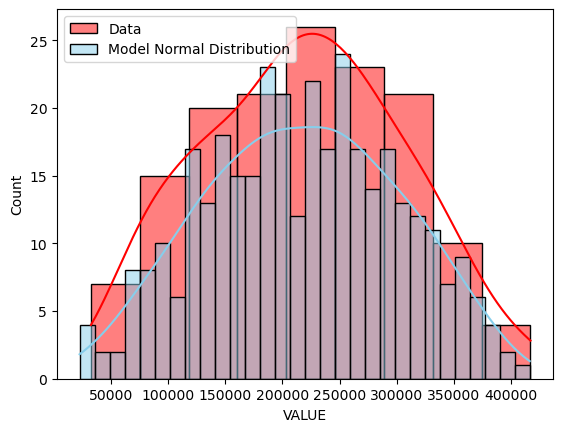

In [31]:
sns.histplot(data=departing_by_sea_summer_df, color='red', x="VALUE", kde = True, label='Data') 
data = np.random.normal(loc=217441.510204, scale=87330.674017, size=350)
sns.histplot(data, kde=True, color='skyblue', bins=30, label='Model Normal Distribution')
plt.legend(loc='upper left')
# Plot the normal distribution curve

<Axes: xlabel='VALUE', ylabel='Count'>

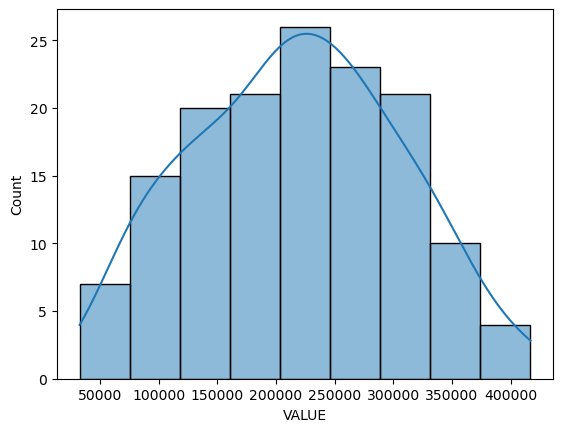

In [32]:
departing_by_sea_summer_df = departing_by_sea_df[departing_by_sea_df['Season'].str.contains('Summer')]
departing_by_air_summer_df = departing_by_air_df[departing_by_air_df['Season'].str.contains('Summer') ]
sns.histplot(data=departing_by_sea_summer_df, x="VALUE", kde = True)

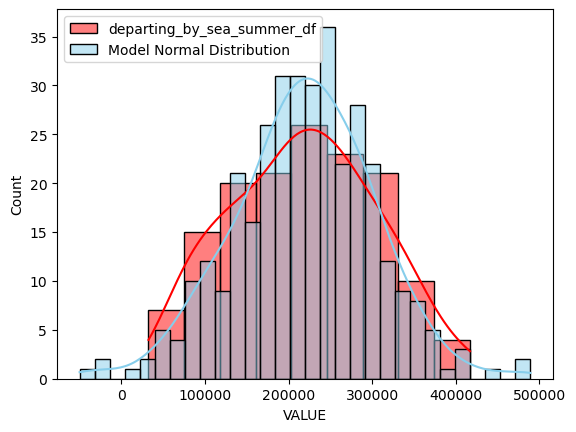

In [33]:
sns.histplot(data=departing_by_sea_summer_df, color='red', x="VALUE", kde = True, label='departing_by_sea_summer_df') 
data = np.random.normal(loc=217441.510204, scale=87330.674017, size=350)
sns.histplot(data, kde=True, color='skyblue', bins=30, label='Model Normal Distribution')
plt.legend(loc='upper left')
# Plot the normal distribution curve
plt.savefig('approx norm')
plt.show()

In [34]:
norm_dist = departing_by_sea_summer_df.describe()
mu = norm_dist.iloc[1, 1]
sigma = norm_dist.iloc[2, 1]

In [35]:
norm.cdf(500000, mu, sigma)

1.0

In [36]:
upper = mu+2*sigma
lower = mu-2*sigma
print(upper, lower)

2013.9646317076586 1957.202034959008


In [37]:
norm_dist

,VALUE,decimal_year
count,147.000000,147.000000
mean,217441.510204,1985.583333
std,87330.674017,14.190649
min,32517.000000,1961.500000
25%,144680.500000,1973.541667
50%,218386.000000,1985.583333
75%,275698.000000,1997.625000
max,416886.000000,2009.666667


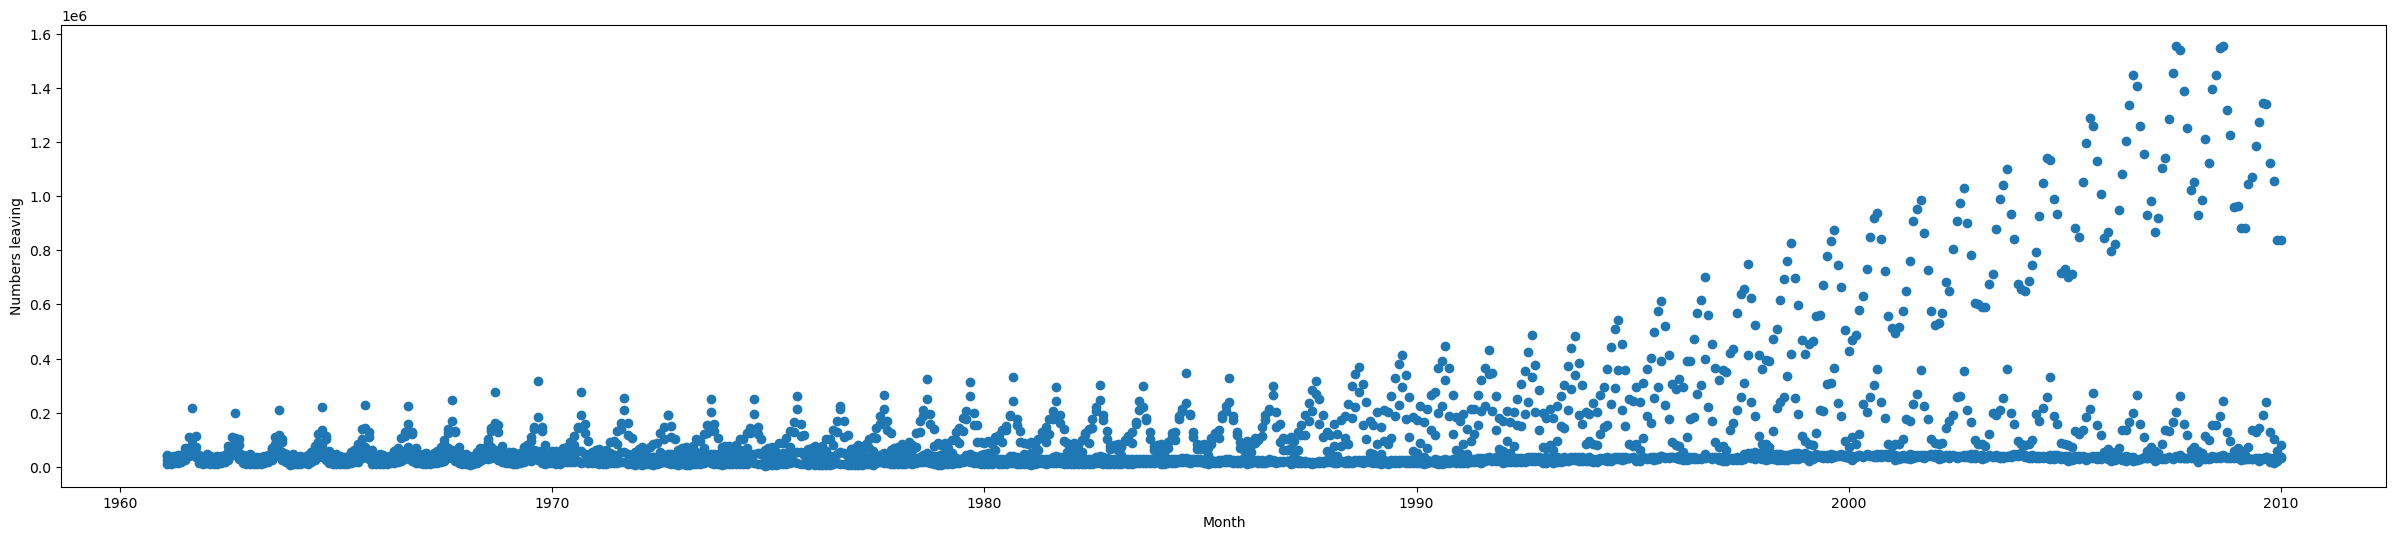

In [38]:
#this needs to be summed across all the categories and replotted
fig, ax = plt.subplots(figsize=(30,6))
ax.scatter(departing_net_df["decimal_year"], departing_net_df["VALUE"])
ax.set_xlabel("Month")
ax.set_ylabel("Numbers leaving")
plt.show()

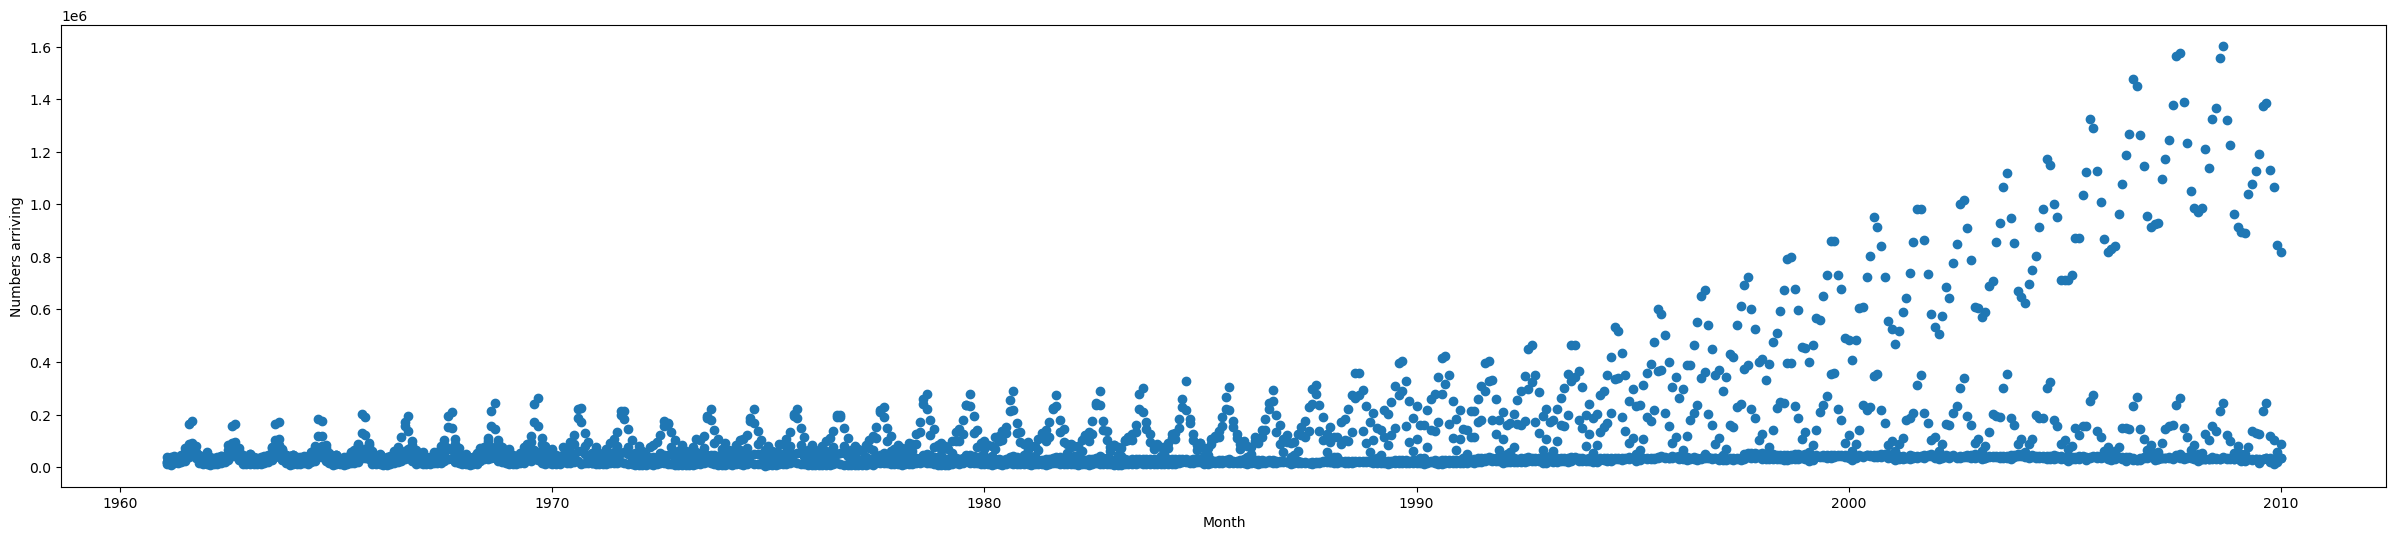

In [39]:
fig, ax = plt.subplots(figsize=(30,6))
ax.scatter(arriving_net_df["decimal_year"], arriving_net_df["VALUE"])
ax.set_xlabel("Month")
ax.set_ylabel("Numbers arriving")
plt.show()


In [40]:
arriving_by_air_df.head(20)

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
5,196101,Arriving in Eire,Passenger Movement by Air from All Airports,18098.0,1961.083333,Winter
27,196102,Arriving in Eire,Passenger Movement by Air from All Airports,17250.0,1961.166667,Winter
49,196103,Arriving in Eire,Passenger Movement by Air from All Airports,26536.0,1961.250000,Spring
71,196104,Arriving in Eire,Passenger Movement by Air from All Airports,30443.0,1961.333333,Spring
93,196105,Arriving in Eire,Passenger Movement by Air from All Airports,38424.0,1961.416667,Spring
115,196106,Arriving in Eire,Passenger Movement by Air from All Airports,58312.0,1961.500000,Summer
137,196107,Arriving in Eire,Passenger Movement by Air from All Airports,89183.0,1961.583333,Summer
159,196108,Arriving in Eire,Passenger Movement by Air from All Airports,90853.0,1961.666667,Summer
181,196109,Arriving in Eire,Passenger Movement by Air from All Airports,59328.0,1961.750000,Autumn
203,196110,Arriving in Eire,Passenger Movement by Air from All Airports,35107.0,1961.833333,Autumn


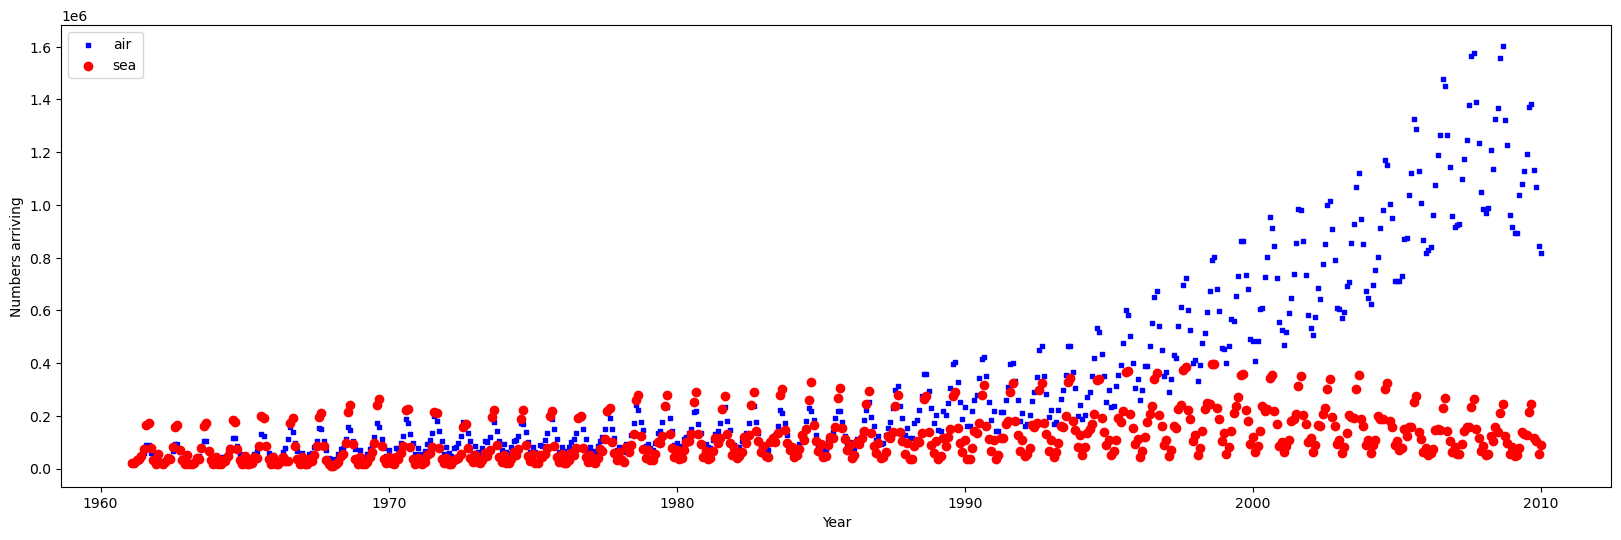

In [41]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(arriving_by_air_df["decimal_year"], arriving_by_air_df["VALUE"], s=10, c='b', marker="s", label='air')
ax.scatter(arriving_by_sea_df["decimal_year"], arriving_by_sea_df["VALUE"], c='r', marker="o", label='sea')
plt.legend(loc='upper left')
ax.set_xlabel("Year")
ax.set_ylabel("Numbers arriving")
plt.show()

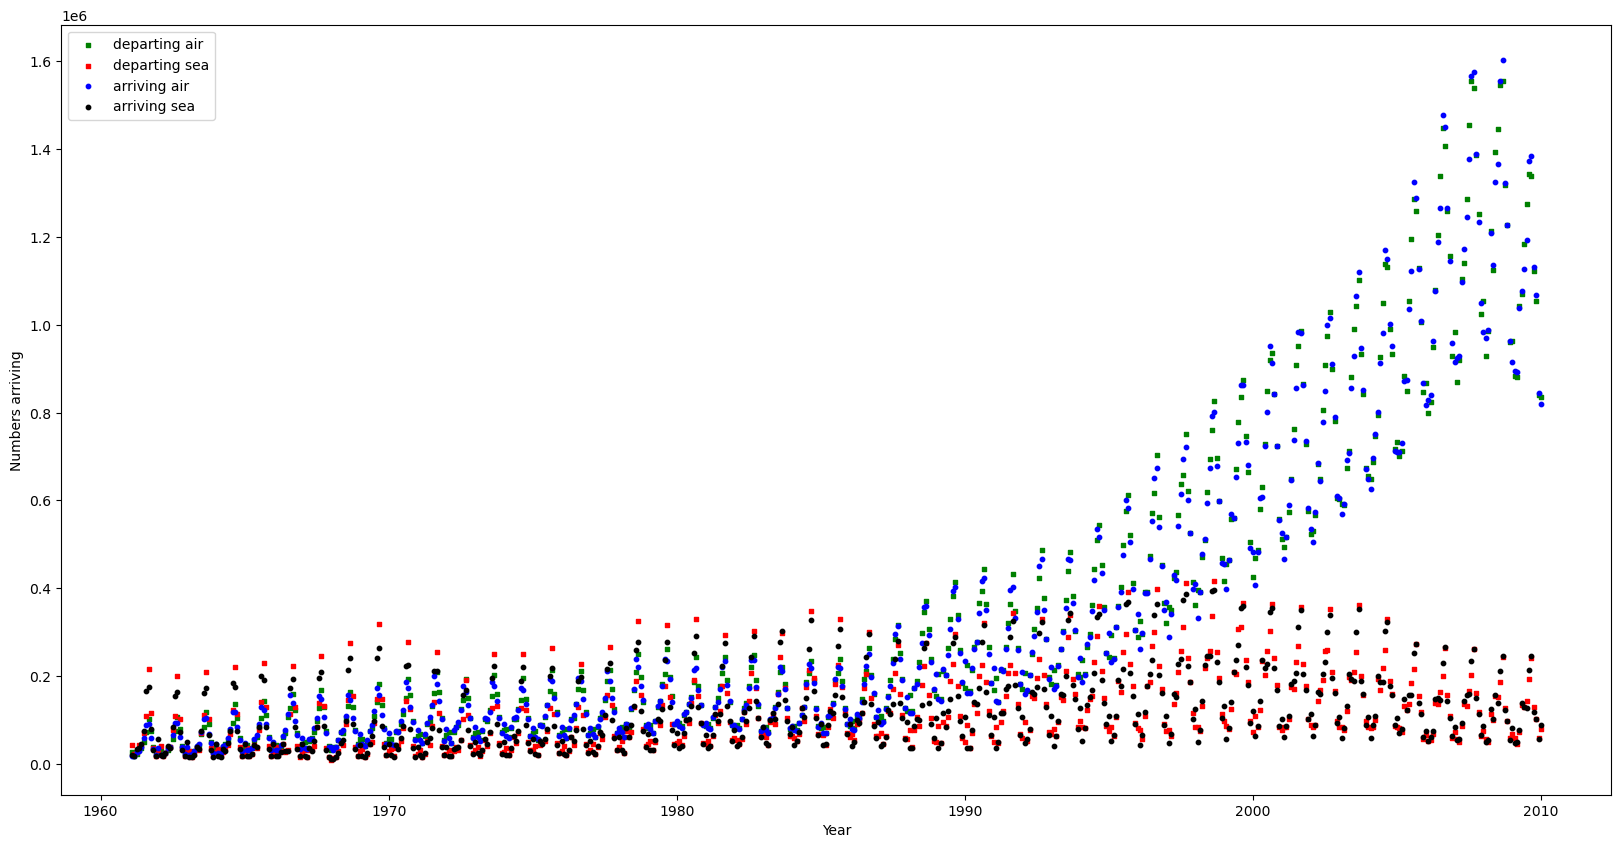

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(departing_by_air_df["decimal_year"], departing_by_air_df["VALUE"], s=10, c='green', marker="s", label='departing air')
ax.scatter(departing_by_sea_df["decimal_year"],departing_by_sea_df["VALUE"],s=10, c='red', marker="s", label='departing sea')
ax.scatter(arriving_by_air_df["decimal_year"], arriving_by_air_df["VALUE"], s=10, c='blue', marker="o", label='arriving air')
ax.scatter(arriving_by_sea_df["decimal_year"], arriving_by_sea_df["VALUE"], s=10, c='black', marker="o", label='arriving sea')
plt.legend(loc='upper left')
ax.set_xlabel("Year")
ax.set_ylabel("Numbers arriving")
plt.savefig('scatter')
plt.show()

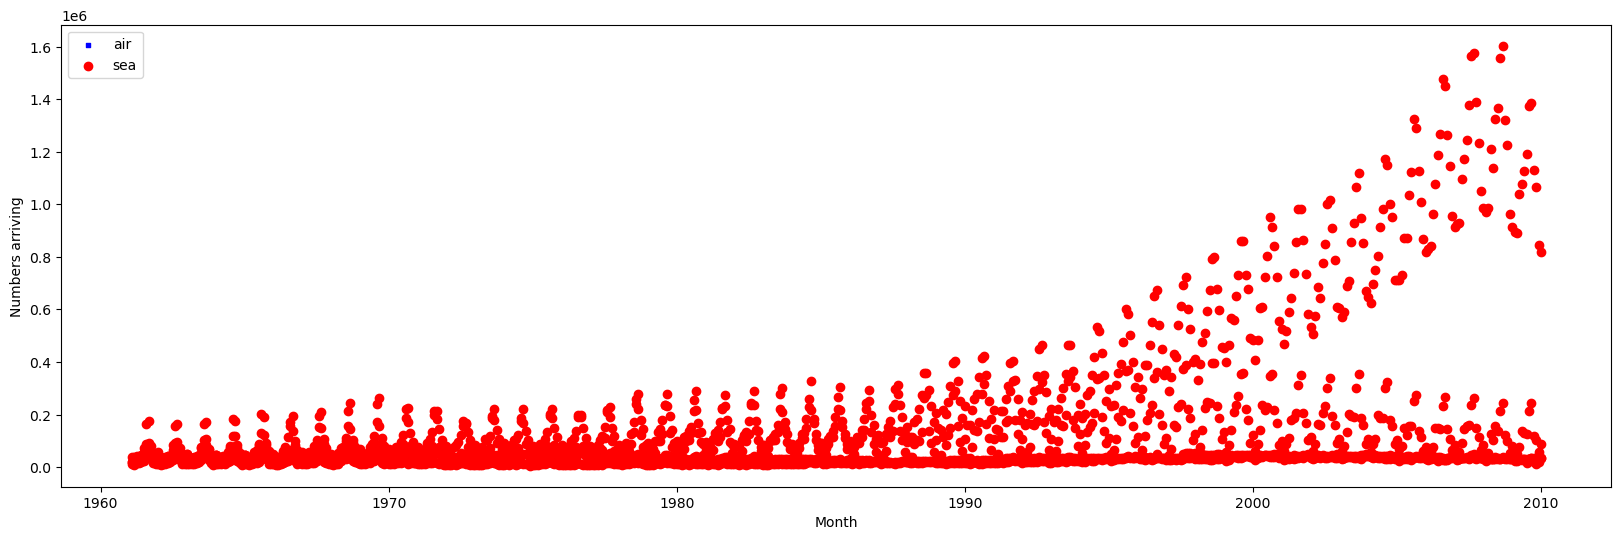

In [43]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(arriving_net_df["decimal_year"],arriving_net_df["VALUE"], s=10, c='b', marker="s", label='air')
ax.scatter(arriving_net_df["decimal_year"], arriving_net_df["VALUE"], c='r', marker="o", label='sea')
plt.legend(loc='upper left')
ax.set_xlabel("Month")
ax.set_ylabel("Numbers arriving")
plt.show()

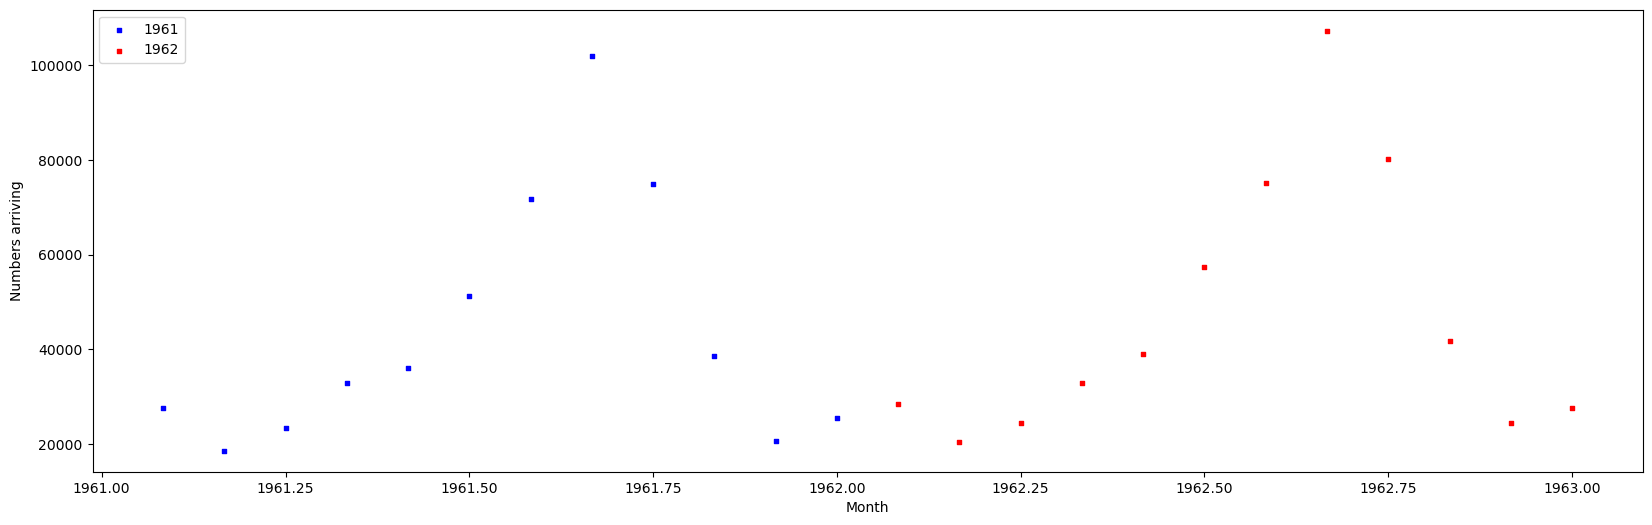

In [44]:
#look at a plot of one year - normally distributed?
departing_by_air_1961_df = departing_by_air_df[departing_by_air_df['Year'].str.contains('1961')]
departing_by_air_1962_df = departing_by_air_df[departing_by_air_df['Year'].str.contains('1962')]
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(departing_by_air_1961_df["decimal_year"], departing_by_air_1961_df["VALUE"], s=10, c='b', marker="s", label='1961')
ax.scatter(departing_by_air_1962_df["decimal_year"], departing_by_air_1962_df["VALUE"], s=10, c='r', marker="s", label='1962')
plt.legend(loc='upper left')
ax.set_xlabel("Month")
ax.set_ylabel("Numbers arriving")
plt.show() 

Text(0, 0.5, 'Number of passengers arriving by air')

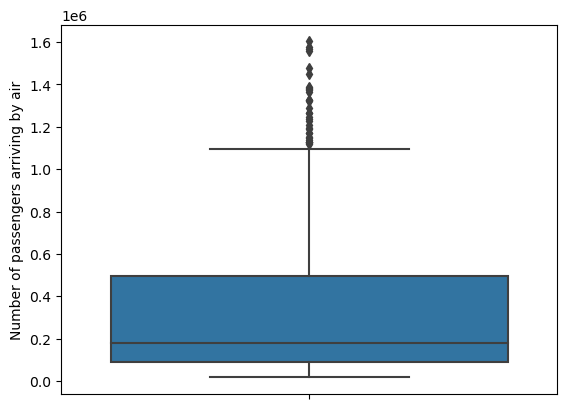

In [45]:
sns.boxplot(y = 'VALUE', data = arriving_by_air_df) #numbers arriving by sea have remained very stable over the years - presents better on the boxplot, too much variance otherwise 
plt.ylabel('Number of passengers arriving by air')

Text(0, 0.5, 'Number of passengers arriving by sea')

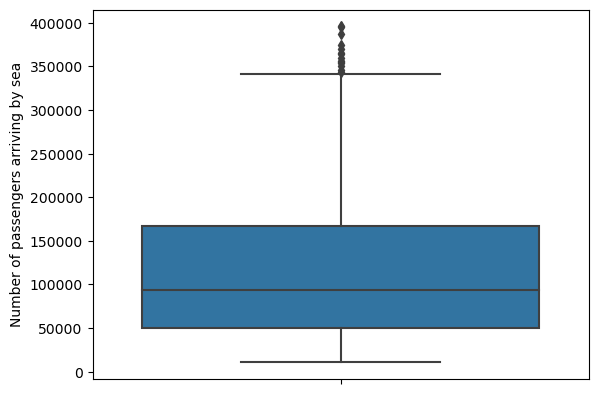

In [46]:
sns.boxplot(y = 'VALUE', data = arriving_by_sea_df) #numbers arriving by sea have remained very stable over the years - presents better on the boxplot, too much variance otherwise
plt.ylabel('Number of passengers arriving by sea')


/var/folders/b_/lhys_mf5099_jpmljbxkw9ww0000gn/T/ipykernel_58629/1946339033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arriving_by_air_df['Dataset'] = 'arriving_by_air_df'
/var/folders/b_/lhys_mf5099_jpmljbxkw9ww0000gn/T/ipykernel_58629/1946339033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arriving_by_sea_df['Dataset'] = 'arriving_by_sea_df'
/var/folders/b_/lhys_mf5099_jpmljbxkw9ww0000gn/T/ipykernel_58629/1946339033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

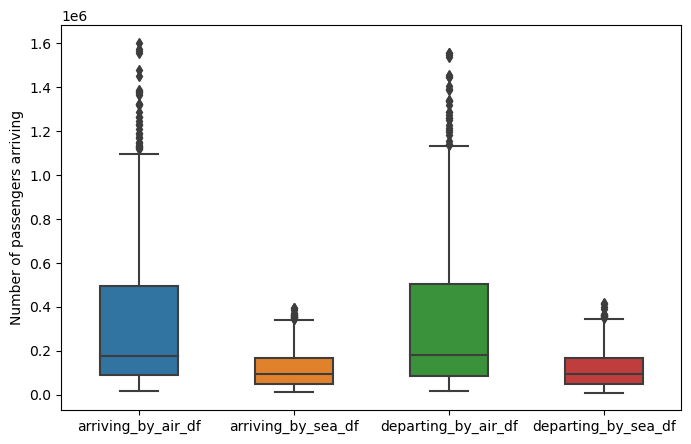

In [47]:
arriving_by_air_df['Dataset'] = 'arriving_by_air_df'
arriving_by_sea_df['Dataset'] = 'arriving_by_sea_df'
departing_by_sea_df['Dataset'] = 'departing_by_sea_df'
departing_by_air_df['Dataset'] = 'departing_by_air_df'
all_data = pd.concat([arriving_by_air_df, arriving_by_sea_df, departing_by_air_df, departing_by_sea_df])
plt.figure(figsize=(8, 5)) 
sns.boxplot(x='Dataset', y='VALUE', data=all_data, width=0.5)
plt.title('') 
plt.xlabel('')  
plt.ylabel('Number of passengers arriving')  
plt.savefig('boxplot')
plt.show()



In [48]:
print(arriving_by_air_df.describe(), arriving_by_sea_df.describe())

              VALUE  decimal_year
count  5.880000e+02    588.000000
mean   3.413003e+05   1985.541667
std    3.579344e+05     14.157105
min    1.725000e+04   1961.083333
25%    8.918600e+04   1973.312500
50%    1.771845e+05   1985.541667
75%    4.945732e+05   1997.770833
max    1.603381e+06   2010.000000                VALUE  decimal_year
count     588.000000    588.000000
mean   118646.709184   1985.541667
std     86918.855434     14.157105
min     10712.000000   1961.083333
25%     49729.000000   1973.312500
50%     93685.000000   1985.541667
75%    166887.750000   1997.770833
max    395819.000000   2010.000000


# Binomial Distribution

In [49]:
#Looking into probability of arriving in to or out of the country
#Need to sum arcoss all the methods of entering and leaving to get the total inbound and outbound
#numbers arriving by departing by sea relatively stable over time - probability will be more constant than air travel
total_departing_by_sea = departing_by_sea_df['VALUE'].sum()
total_arriving_by_sea = arriving_by_sea_df['VALUE'].sum()
total_sea_df = passenger_movement_df[passenger_movement_df['Type of Passenger Movement'] == 'Passenger Movement by Sea to All Countries'] 

# Sum the values in 'column_to_sum' from the filtered DataFrame
total_movement_sea = total_sea_df['VALUE'].sum()
print(total_departing_by_sea, total_arriving_by_sea, total_movement_sea)
#copied

69555589.0 69764265.0 139319854.0


In [50]:
p = total_departing_by_sea/total_movement_sea
q = total_arriving_by_sea/total_movement_sea
print(p,q)
#copied

0.49925109022867625 0.5007489097713238


In [51]:
p + q == 1
#copied

True

In [52]:
#if xx number of people are chosen at random who arrived by sea what is the probability they were entering or leaving the country?
from scipy.stats import binom
#binom.pmf(k = number that you want, n = sample size or limit, p = probability)
binom.pmf(50, 100, p)
#there is a probability of 0.246 that exactly 5 out of 10 people were departing the country by sea from 1961 to 2009
#copied

0.07958031010088987

In [53]:
binom.cdf(5, 10, p) #from of less than 5 (4 or less) departing

0.6248885093777816

In [54]:
binom.sf(5, 10, p) #4 or more departing

0.3751114906222183

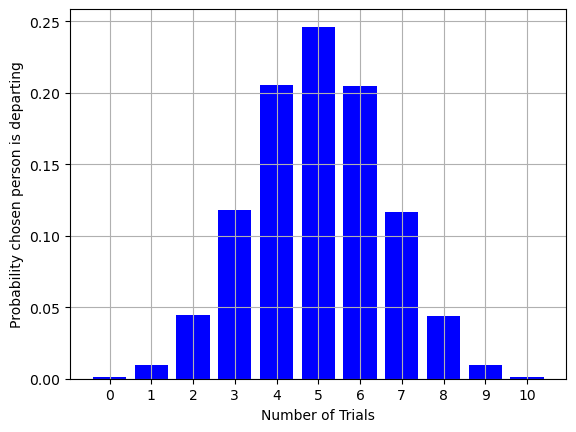

In [55]:
n = 10  # Number of trials

# Generate x values (number of successes)
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
probabilities = binom.pmf(x_values, n, p)

# Plot the binomial distribution
plt.bar(x_values, probabilities, color='blue')
plt.xlabel('Number of Trials')
plt.ylabel('Probability chosen person is departing')
plt.xticks(x_values)
plt.grid(True)
plt.show()

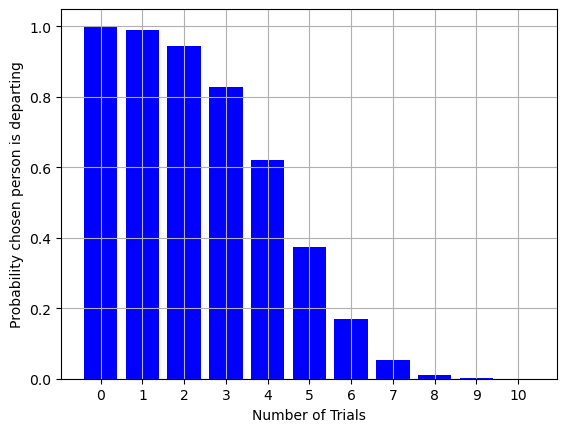

In [56]:
n = 10  # Number of trials

# Generate x values (number of successes)
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
probabilities = binom.sf(x_values, n, p)

# Plot the binomial distribution
plt.bar(x_values, probabilities, color='blue')
plt.xlabel('Number of Trials')
plt.ylabel('Probability chosen person is departing')
plt.xticks(x_values)
plt.grid(True)
plt.show()

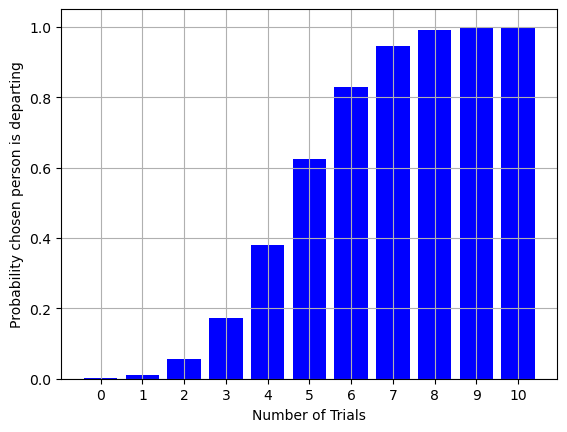

In [57]:
n = 10  # Number of trials

# Generate x values (number of successes)
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
probabilities = binom.cdf(x_values, n, p)

# Plot the binomial distribution
plt.bar(x_values, probabilities, color='blue')
plt.xlabel('Number of Trials')
plt.ylabel('Probability chosen person is departing')
plt.xticks(x_values)
plt.grid(True)
plt.show()

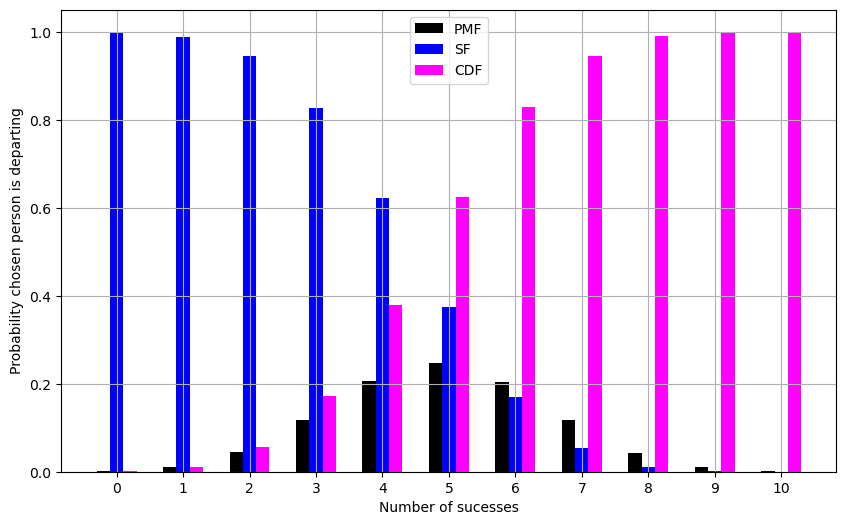

In [58]:
n = 10
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
probabilities_pmf = binom.pmf(x_values, n, p)
probabilities_sf = binom.sf(x_values, n, p)
probabilities_cdf = binom.cdf(x_values, n, p)

# Plot the binomial distributions
plt.figure(figsize=(10, 6))

# Plot PMF
plt.bar(x_values - 0.2, probabilities_pmf, width=0.2, color='black', label='PMF')

# Plot SF
plt.bar(x_values, probabilities_sf, width=0.2, color='blue', label='SF')

# Plot CDF
plt.bar(x_values + 0.2, probabilities_cdf, width=0.2, color='magenta', label='CDF')

plt.xlabel('Number of sucesses')
plt.ylabel('Probability chosen person is departing')
plt.xticks(x_values)
plt.legend()
plt.grid(True)
plt.savefig('binomial')
plt.show()

In [59]:
#Two probabilities are approx equal
#Expected value over the long run that 10 people would be departing
n = 10
expected_value = 10*p
expected_value
#

4.992510902286763

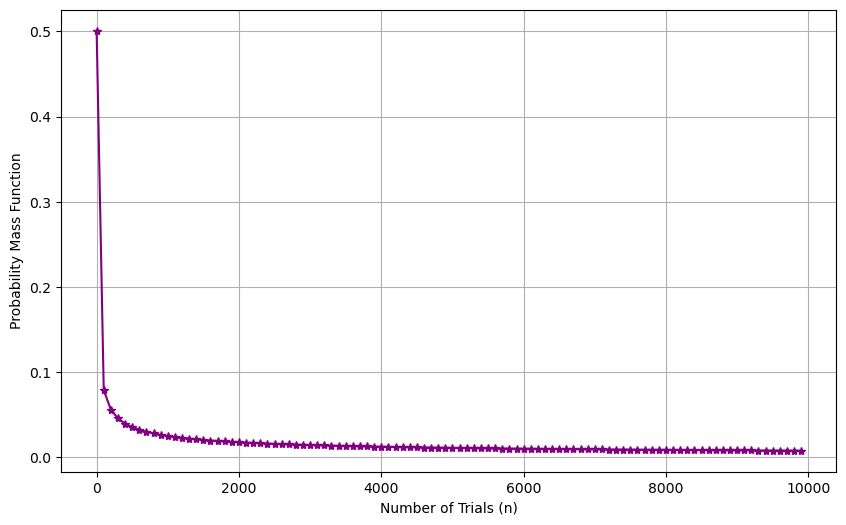

In [60]:
n_values = []
k_values = []
pmf_values = []

for i in range(1, 10000, 100):  
    n = i
    k = i // 2  # Set k to half of n
    pmf = binom.pmf(k, n, p)
    
    # Append values to lists
    n_values.append(n)
    k_values.append(k)
    pmf_values.append(pmf)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, pmf_values, marker='*', linestyle='-', color = 'purple')
plt.xlabel('Number of Trials (n)')
plt.ylabel('Probability Mass Function')
plt.grid(True)
plt.savefig('binomial large number of trails')
plt.show()

# Poisson

In [61]:
#finding the average number of people moving by by sea
from scipy.stats import poisson
total_number_of_months = len(departing_by_sea_df)
lambda_poisson_daily= (total_departing_by_sea + total_arriving_by_sea)/(total_number_of_months*365)#per day
lambda_poisson_daily #avergae number of people coming a day

649.1466498928338

In [62]:
k = round(lambda_poisson_daily)
poisson.pmf(k, lambda_poisson_daily)

0.01565758428655263

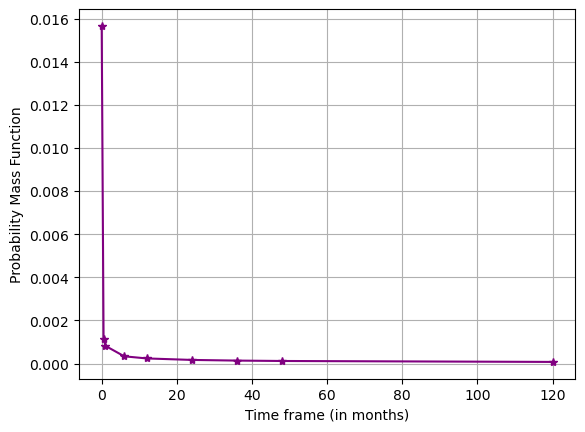

In [63]:
lambda_poisson_values = []
pmf_values = []
lambda_poisson = (total_departing_by_sea + total_arriving_by_sea) / total_number_of_months
time_scale = [1/365, 0.5, 1, 6, 12, 24, 36, 48, 120]

for time in time_scale:
    lambda_poisson_i = lambda_poisson * time
    k = round(lambda_poisson_i)
    pmf = poisson.pmf(k, lambda_poisson_i)  # Calculate PMF for lambda_poisson_i
    # Append values to lists
    lambda_poisson_values.append(lambda_poisson_i)
    pmf_values.append(pmf)

# Plot the results
plt.plot(time_scale, pmf_values, marker='*', linestyle='-', color = 'purple')

plt.xlabel('Time frame (in months)')
plt.ylabel('Probability Mass Function')
#plt.legend()
plt.grid(True)
plt.savefig('large_poisson.png')
plt.show()

# Machine Learning

# KNN Nearest Neighbours

Initial plan is to determine if the person is entering or leaving the country based off of the month they travelled, method of travel and the number of other people that travelled in that way - going to need to scale the data for sure but will do that afterwards

In [64]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
passenger_movement_df

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,196101,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333,Winter
1,196101,Arriving in Eire,Passenger Movement by Sea to Great Britain,19963.0,1961.083333,Winter
2,196101,Arriving in Eire,Passenger Movement by Sea to Countries Other T...,139.0,1961.083333,Winter
3,196101,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333,Winter
4,196101,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333,Winter
...,...,...,...,...,...,...
12931,200912,Departing Eire,Passenger Movement by Air from Dublin Airport,664962.0,2010.000000,Winter
12932,200912,Departing Eire,Passenger Movement by Air from Cork Airport,76086.0,2010.000000,Winter
12933,200912,Departing Eire,Passenger Movement by Air from Shannon Airport,61229.0,2010.000000,Winter
12934,200912,Departing Eire,Passenger Movement by Air from Shannon Airport...,50767.0,2010.000000,Winter


In [65]:
#sns.heatmap(passenger_movement_df.corr(), annot = True, fmt = '.2f', linewidths = 2)

In [66]:
print(passenger_movement_df.groupby('Type of Passenger Movement').size())

Type of Passenger Movement
Passenger Movement Cross-Border Bus                                1174
Passenger Movement Cross-Border Rail                               1176
Passenger Movement by Air from All Airports                        1176
Passenger Movement by Air from Cork Airport                        1176
Passenger Movement by Air from Dublin Airport                      1176
Passenger Movement by Air from Shannon Airport                     1176
Passenger Movement by Air from Shannon Airport (Eastbound)         1176
Passenger Movement by Air from Shannon Airport (Westbound)         1176
Passenger Movement by Sea to All Countries                         1176
Passenger Movement by Sea to Countries Other Than Great Britain    1176
Passenger Movement by Sea to Great Britain                         1176
dtype: int64


In [67]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
#Need to encode all categorical data
# passenger_movement_df_encoded = passenger_movement_df.copy()
# passenger_movement_df_encoded['Season'] = lencoder.fit_transform(passenger_movement_df_encoded['Season'])
# passenger_movement_df_encoded['Direction'] = lencoder.fit_transform(passenger_movement_df_encoded['Direction'])
# passenger_movement_df_encoded['Type of Passenger Movement'] = lencoder.fit_transform(passenger_movement_df_encoded['Type of Passenger Movement'])

# passenger_movement_df_encoded

In [68]:
passenger_movement_df['Year'] = passenger_movement_df['Year'].astype(float)

def encode(dataFrame): #function to encode any dataframe
    encoded_df = dataFrame.copy()
    for column in encoded_df.columns:
        if encoded_df[column].dtype == 'object':
            encoded_df[column] = lencoder.fit_transform(encoded_df[column])
    return encoded_df

In [69]:
passenger_movement_df_encoded = encode(passenger_movement_df)
passenger_movement_df_encoded.head(50)

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,196101.0,0,8,20102.0,1961.083333,3
1,196101.0,0,10,19963.0,1961.083333,3
2,196101.0,0,9,139.0,1961.083333,3
3,196101.0,0,1,10344.0,1961.083333,3
4,196101.0,0,0,40063.0,1961.083333,3
5,196101.0,0,2,18098.0,1961.083333,3
6,196101.0,0,4,16762.0,1961.083333,3
7,196101.0,0,3,0.0,1961.083333,3
8,196101.0,0,5,1336.0,1961.083333,3
9,196101.0,0,6,747.0,1961.083333,3


In [70]:
from sklearn.model_selection import train_test_split
#Going to add another column based off of the time of year 
#month 02, 03, 04 = spring
#month 05, 06, 07 = summer
#month 08, 09, 10 = autumn
#month 11,12, 01 = winter
passenger_movement_df_encoded.iloc[:,2:6]

,Type of Passenger Movement,VALUE,decimal_year,Season
0,8,20102.0,1961.083333,3
1,10,19963.0,1961.083333,3
2,9,139.0,1961.083333,3
3,1,10344.0,1961.083333,3
4,0,40063.0,1961.083333,3
...,...,...,...,...
12931,4,664962.0,2010.000000,3
12932,3,76086.0,2010.000000,3
12933,5,61229.0,2010.000000,3
12934,6,50767.0,2010.000000,3


In [71]:
 passenger_movement_df_encoded.iloc[:,1] 

0        0
1        0
2        0
3        0
4        0
        ..
12931    1
12932    1
12933    1
12934    1
12935    1
Name: Direction, Length: 12934, dtype: int64

In [72]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 30)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors)) 

from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(passenger_movement_df_encoded.iloc[:,2:6], 
                                                                 passenger_movement_df_encoded.iloc[:,1], test_size=0.3, random_state=42)
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((9053, 4), (9053,), (3881, 4), (3881,))

In [139]:
train_label

5106     0
6983     0
7859     0
4508     1
4342     0
        ..
11964    1
5191     1
5390     0
860      0
7270     0
Name: Direction, Length: 9053, dtype: int64

In [73]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)      # Save the score value in the train_accuracy array

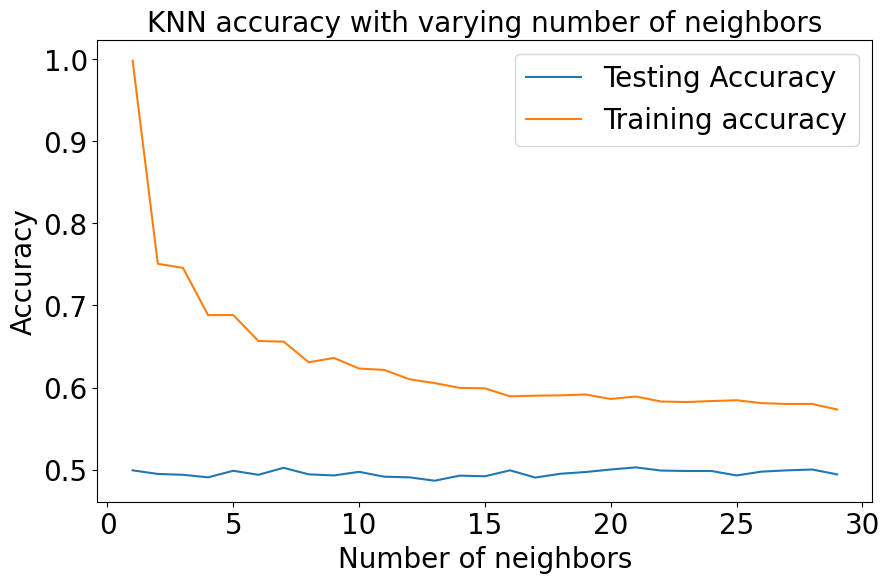

In [74]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [75]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 10)

# Fit the model
knn.fit(train_data, train_label)

# Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)
# Display the test accuracy
print(test_accuracy)

0.4975521772738985


In [76]:
from sklearn.metrics import confusion_matrix

# Predict the results by calling a method 'predict()'
prediction = knn.predict(test_data)

# Display the confusion matrix - 
confusion_matrix(test_label, prediction)

array([[1224,  702],
       [1248,  707]])

In [77]:
# import the library classification_report
from sklearn.metrics import classification_report

# Display the report
print(classification_report(test_label, prediction))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56      1926
           1       0.50      0.36      0.42      1955

    accuracy                           0.50      3881
   macro avg       0.50      0.50      0.49      3881
weighted avg       0.50      0.50      0.49      3881



In [78]:
#scaling the data
passenger_movement_df.describe() #huge variance in value - encode to improve machine learning outcomes

,Year,VALUE,decimal_year
count,12934.000000,1.293400e+04,12934.000000
mean,198506.174424,9.242068e+04,1985.538349
std,1414.139381,1.769196e+05,14.144184
min,196101.000000,0.000000e+00,1961.083333
25%,197303.250000,1.340125e+04,1973.270833
50%,198506.000000,3.542900e+04,1985.500000
75%,199709.000000,8.617450e+04,1997.750000
max,200912.000000,1.603381e+06,2010.000000


In [79]:
import sklearn.preprocessing as preproc
passenger_movement_df_scaled = passenger_movement_df_encoded.copy()
passenger_movement_df_scaled['VALUE'] = preproc.minmax_scale(passenger_movement_df_scaled['VALUE'])
passenger_movement_df_scaled

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,196101.0,0,8,0.012537,1961.083333,3
1,196101.0,0,10,0.012451,1961.083333,3
2,196101.0,0,9,0.000087,1961.083333,3
3,196101.0,0,1,0.006451,1961.083333,3
4,196101.0,0,0,0.024987,1961.083333,3
...,...,...,...,...,...,...
12931,200912.0,1,4,0.414725,2010.000000,3
12932,200912.0,1,3,0.047453,2010.000000,3
12933,200912.0,1,5,0.038187,2010.000000,3
12934,200912.0,1,6,0.031662,2010.000000,3


In [80]:
#repeat the above process on the scaled values

In [81]:
neighbors = np.arange(1, 30)                  # number of neighbors
train_accuracy2 = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy2 = np.zeros(len(neighbors)) 
train_data2,test_data2,train_label2,test_label2 = train_test_split(passenger_movement_df_scaled.iloc[:,2:6], 
                                                                 passenger_movement_df_scaled.iloc[:,1], test_size=0.05, random_state=42)
train_data2.shape,train_label2.shape,test_data2.shape,test_label2.shape

((12287, 4), (12287,), (647, 4), (647,))

In [82]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data2, train_label2)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy2[i] = knn.score(train_data2, train_label2)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy2[i] = knn.score(test_data2, test_label2)  

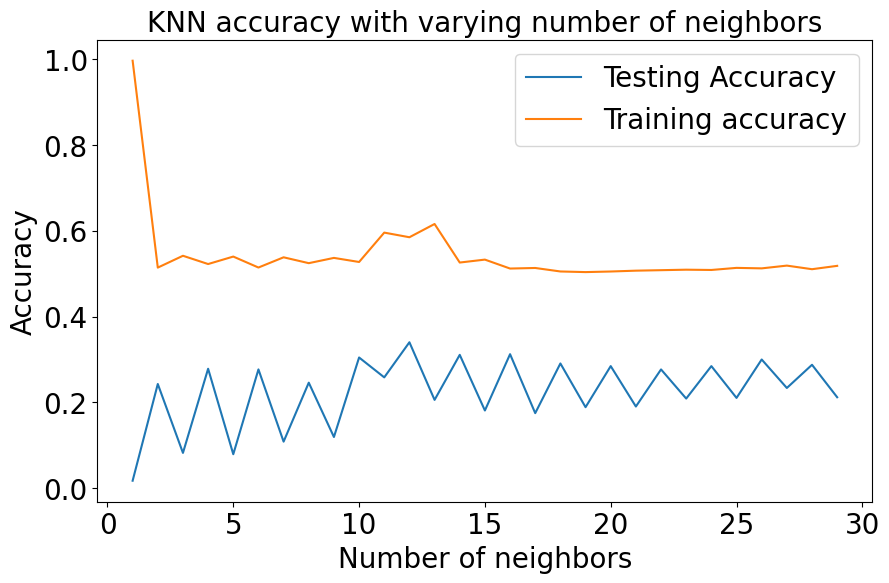

In [83]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy2, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy2, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Decision Trees/Random Forests - not working

In [158]:
X = passenger_movement_df_scaled.iloc[:, 2:6].values 

y = passenger_movement_df_scaled.iloc[:, 1].values

# Display X and y 
X, y

(array([[8.00000000e+00, 1.25372572e-02, 1.96108333e+03, 3.00000000e+00],
        [1.00000000e+01, 1.24505654e-02, 1.96108333e+03, 3.00000000e+00],
        [9.00000000e+00, 8.66918094e-05, 1.96108333e+03, 3.00000000e+00],
        ...,
        [5.00000000e+00, 3.81874302e-02, 2.01000000e+03, 3.00000000e+00],
        [6.00000000e+00, 3.16624682e-02, 2.01000000e+03, 3.00000000e+00],
        [7.00000000e+00, 6.52496194e-03, 2.01000000e+03, 3.00000000e+00]]),
 array([0, 0, 0, ..., 1, 1, 1]))

In [159]:
# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) #25% to testing, random_state = same result against different calls

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12934, 4), (12934,), (9700, 4), (3234, 4), (9700,), (3234,))

In [160]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0) #11 possible parameters 

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [161]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.53      0.18      0.27      1628
           1       0.50      0.84      0.63      1606

    accuracy                           0.51      3234
   macro avg       0.51      0.51      0.45      3234
weighted avg       0.51      0.51      0.45      3234



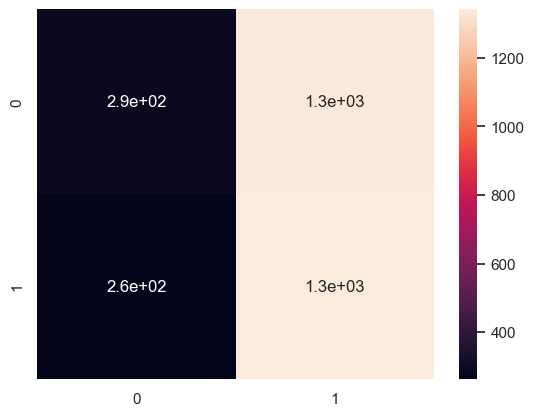

In [162]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [163]:
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5055658627087198


[Text(0.5, 0.875, 'x[1] <= 0.013\ngini = 0.5\nsamples = 9700\nvalue = [4839, 4861]'),
 Text(0.25, 0.625, 'x[1] <= 0.01\ngini = 0.5\nsamples = 3414\nvalue = [1751, 1663]'),
 Text(0.125, 0.375, 'x[0] <= 6.5\ngini = 0.5\nsamples = 2857\nvalue = [1433, 1424]'),
 Text(0.0625, 0.125, 'gini = 0.499\nsamples = 1631\nvalue = [773, 858]'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 1226\nvalue = [660, 566]'),
 Text(0.375, 0.375, 'x[1] <= 0.013\ngini = 0.49\nsamples = 557\nvalue = [318, 239]'),
 Text(0.3125, 0.125, 'gini = 0.492\nsamples = 549\nvalue = [310, 239]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.75, 0.625, 'x[1] <= 0.014\ngini = 0.5\nsamples = 6286\nvalue = [3088, 3198]'),
 Text(0.625, 0.375, 'x[2] <= 1963.583\ngini = 0.482\nsamples = 190\nvalue = [77, 113]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6875, 0.125, 'gini = 0.487\nsamples = 184\nvalue = [77, 107]'),
 Text(0.875, 0.375, 'x[1] <= 0.014\ngini = 0.5\nsamples =

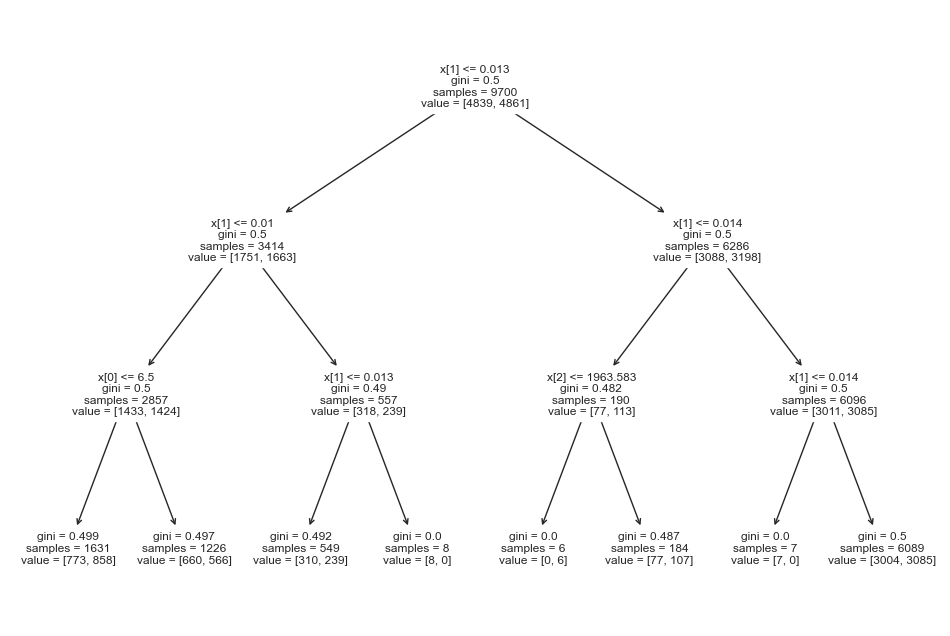

In [164]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train)) 

In [91]:
# from matplotlib.colors import ListedColormap

# # Store the data into X_set and y_set
# X_set, y_set = X_train, y_train

# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Decision Tree Classification (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Linear Regression

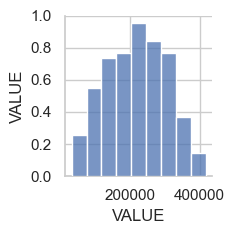

In [92]:
# import the libraries for the plot

# Set the style for the plot using swaborn library
sns.set(style='whitegrid', context='notebook')

# Consider the following columns from the entire dataset
cols = ['VALUE']

# Display the pairplot using the above-mentioned columns
sns.pairplot(departing_by_sea_summer_df[cols], height = 2.5)

plt.tight_layout()

# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

In [93]:
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

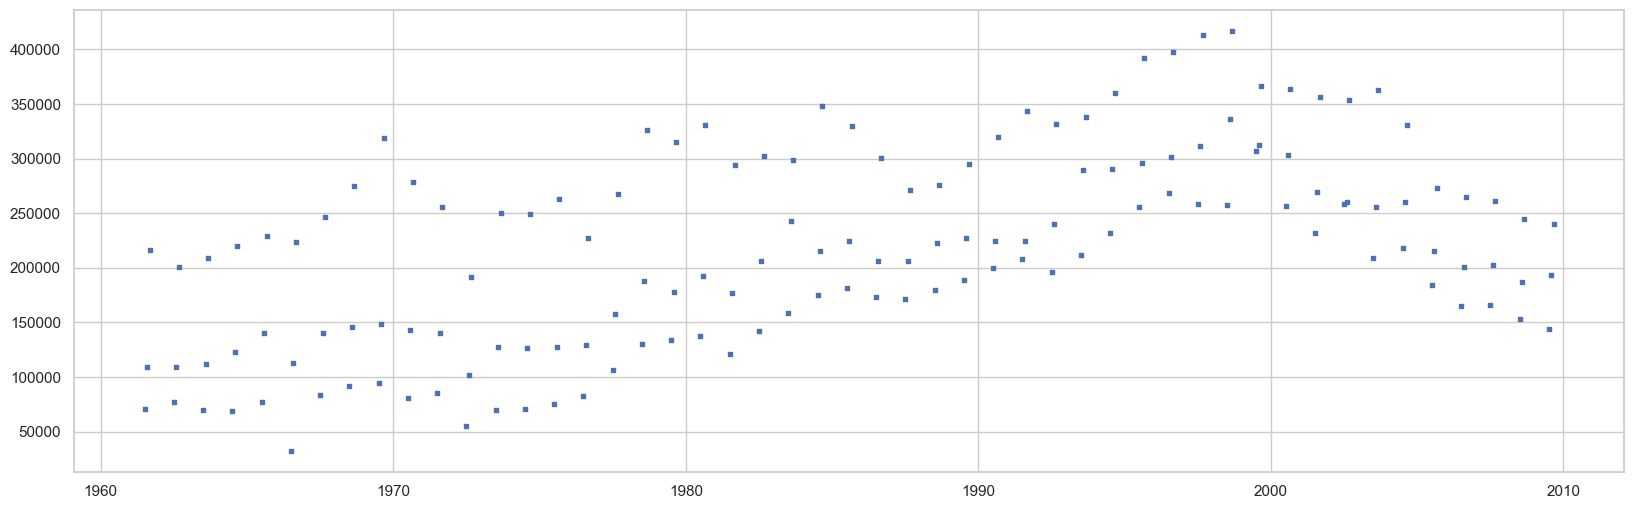

In [142]:
#From january every year
departing_by_sea_winter_df = departing_by_sea_df[departing_by_sea_df['Season'].str.contains('Summer')]
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(departing_by_sea_winter_df["decimal_year"], departing_by_sea_winter_df["VALUE"], s=10, c='b', marker="s", label='air')

Text(0.5, 1.0, 'Boxplot')

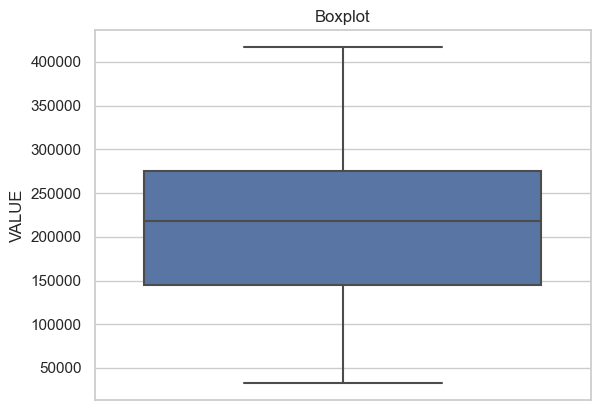

In [143]:
sns.boxplot(y = 'VALUE', data = (departing_by_sea_winter_df)) #numbers arriving by sea have remained very stable over the years - presents better on the boxplot, too much variance otherwise
plt.title('Boxplot') 

In [144]:
X = departing_by_sea_winter_df[['decimal_year']].values
y = departing_by_sea_winter_df[['VALUE']].values

In [145]:
X.shape, y.shape

((147, 1), (147, 1))

In [146]:
# Import the library for normalization of the data
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preproc

# Initialise the objects using StandardScaler() 
sc_x = StandardScaler()
sc_y = StandardScaler()
#X_std = preproc.minmax_scale(X)
#y_std = preproc.minmax_scale(y)
#df["minmax"] = preproc.minmax_scale(df[[" n_tokens_content"]]) #2 brackets as 2 dimensions
# Train the objects using fit_transform()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
#Data is skewed to the right so trying minmax scaling
y_len = len(y_std)

print(X_std, y_std)

[[-1.70292912]
 [-1.69703663]
 [-1.69114415]
 [-1.63221926]
 [-1.62632677]
 [-1.62043429]
 [-1.5615094 ]
 [-1.55561691]
 [-1.54972443]
 [-1.49079954]
 [-1.48490705]
 [-1.47901457]
 [-1.42008968]
 [-1.41419719]
 [-1.40830471]
 [-1.34937982]
 [-1.34348733]
 [-1.33759485]
 [-1.27866996]
 [-1.27277748]
 [-1.26688499]
 [-1.2079601 ]
 [-1.20206762]
 [-1.19617513]
 [-1.13725024]
 [-1.13135776]
 [-1.12546527]
 [-1.06654038]
 [-1.0606479 ]
 [-1.05475541]
 [-0.99583052]
 [-0.98993804]
 [-0.98404555]
 [-0.92512066]
 [-0.91922818]
 [-0.91333569]
 [-0.8544108 ]
 [-0.84851832]
 [-0.84262583]
 [-0.78370095]
 [-0.77780846]
 [-0.77191597]
 [-0.71299109]
 [-0.7070986 ]
 [-0.70120611]
 [-0.64228123]
 [-0.63638874]
 [-0.63049625]
 [-0.57157137]
 [-0.56567888]
 [-0.55978639]
 [-0.50086151]
 [-0.49496902]
 [-0.48907653]
 [-0.43015165]
 [-0.42425916]
 [-0.41836667]
 [-0.35944179]
 [-0.3535493 ]
 [-0.34765681]
 [-0.28873193]
 [-0.28283944]
 [-0.27694695]
 [-0.21802207]
 [-0.21212958]
 [-0.20623709]
 [-0.14731

In [147]:
# Reshape the (506, 1) to (506,) array for Machine Learning model
y_std = np.reshape(y_std, len(y_std))

# Display the number of rows and columns
X_std.shape, y_std.shape

((147, 1), (147,))

In [148]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

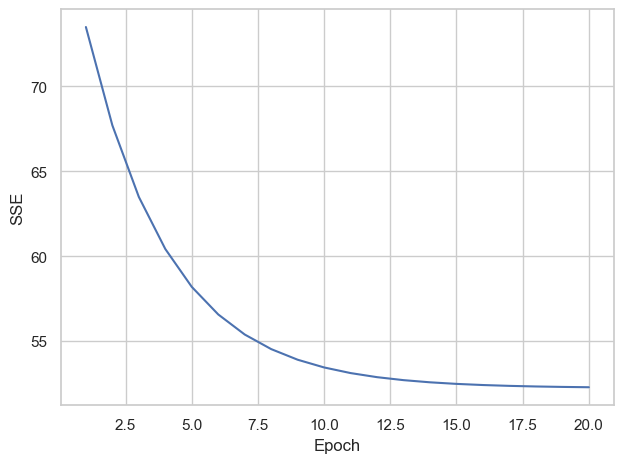

In [149]:
# Draw a plot using linear regression iterations and cost
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')           # SSE means 'sum of squares error'
plt.xlabel('Epoch')         # The number of epochs is a hyperparameter that defines the number times 
                            # that the learning algorithm will work through the entire training 
                            # dataset. One epoch means that each sample in the training dataset has 
                            # had an opportunity to update the internal model parameters. 
                            # An epoch is comprised of one or more batches.
plt.tight_layout()
plt.savefig('cost.png', dpi = 300)
plt.show()

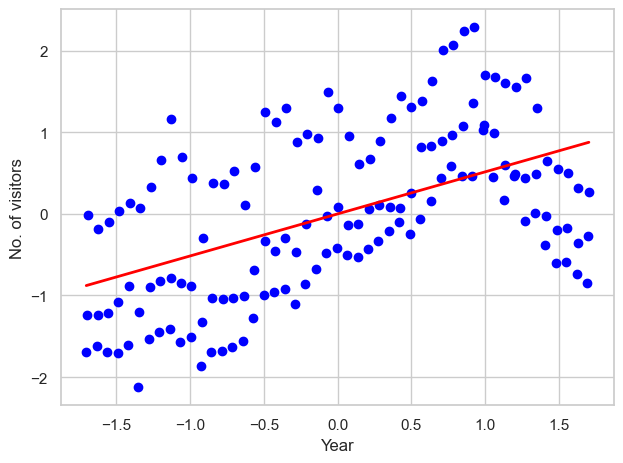

In [150]:
# Method or Function for Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return
# Call the method lin_regplot()

lin_regplot(X_std, y_std, lr)
plt.xlabel('Year')
plt.ylabel('No. of visitors')
plt.tight_layout()
#plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()
#outiers can clearly be seen

In [151]:
# Display the slope and intercept of the line
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.516
Intercept: -0.000


In [166]:
# Transform the year
year_std = preproc.minmax_scale([[1990]])


# Predicted visitors based on the year
vistors_std = lr.predict(year_std)

# Reshape the price_std array to be 2D
vistors_std_2d = vistors_std.reshape(-1, 1)

# Display the predicted number based on 1970
print("Number of visitors: %.3f" % sc_y.inverse_transform(vistors_std_2d))

Number of visitors: 217441.510


# Estimating coefficient of a regression model via scikit-learn

In [153]:
# import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

# Initialise an object named as 'slr' by calling a method LinearRegression()
slr = LinearRegression()

# Train the model
slr.fit(X_std, y_std)

# Predict the results
y_pred = slr.predict(X)

# Display the Slope and Intercept values
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.538
Intercept: -0.000


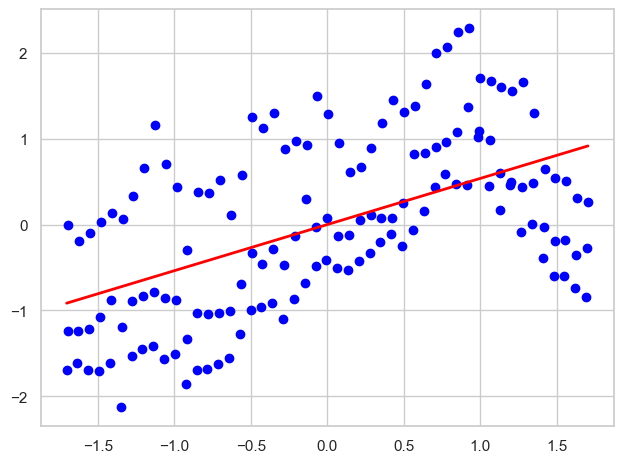

In [154]:
# Display the regression plot using lin_regplot() method
lin_regplot(X_std, y_std, slr)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
# plt.savefig('./figures/scikit_lr_fit.png', dpi=300)
plt.show()

In [155]:
# import RANSACRegressor library
from sklearn.linear_model import RANSACRegressor

# Initialise an object by calling an object RANSACRegressor()
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials = 100, 
                         min_samples = 50,                          
                         residual_threshold = 10, 
                         random_state = 0)
ransac.fit(X, y)

# Store the values for inlier and outlier masks
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(1950, 2020, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c = 'lightgreen', marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac, color = 'red')   
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='upper left')
plt.scatter(X, y, c = 'blue', marker = 'o', label = 'Inliers')
#lin_regplot(X_std, y_std, ransac_fit)
plt.tight_layout()
plt.xlim(1950, 2020)
# plt.savefig('./figures/ransac_fit.png', dpi=300)
plt.show()

ValueError: RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).

In [156]:
# Display the coefficients and intercepts
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

AttributeError: 'RANSACRegressor' object has no attribute 'estimator_'

# Evaluating the performance of linear regression models

In [109]:
arriving_df_encoded = encode(arriving_df)
#departing_by_sea_winter_df_encoded

In [110]:
arriving_df_encoded.head()

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,0,0,8,20102.0,1961.083333,3
1,0,0,10,19963.0,1961.083333,3
2,0,0,9,139.0,1961.083333,3
3,0,0,1,10344.0,1961.083333,3
4,0,0,0,40063.0,1961.083333,3


In [111]:
arriving_df_encoded.iloc[:, list(range(1, 3)) + list(range(4, 6))]
#departing_by_sea_winter_df['VALUE'].values
#maybe type of encoding is not corret?

,Direction,Type of Passenger Movement,decimal_year,Season
0,0,8,1961.083333,3
1,0,10,1961.083333,3
2,0,9,1961.083333,3
3,0,1,1961.083333,3
4,0,0,1961.083333,3
...,...,...,...,...
12920,0,4,2010.000000,3
12921,0,3,2010.000000,3
12922,0,5,2010.000000,3
12923,0,6,2010.000000,3


In [112]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare a variable named as 'X' and 'y'
X = arriving_df_encoded.iloc[:, list(range(1, 3)) + list(range(4, 6))].values #add all - need to encode the matrix first
y = arriving_df_encoded['VALUE'].values                    

# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6467, 4), (6467,), (4526, 4), (1941, 4), (4526,), (1941,))

In [113]:
X

array([[   0.        ,    8.        , 1961.08333333,    3.        ],
       [   0.        ,   10.        , 1961.08333333,    3.        ],
       [   0.        ,    9.        , 1961.08333333,    3.        ],
       ...,
       [   0.        ,    5.        , 2010.        ,    3.        ],
       [   0.        ,    6.        , 2010.        ,    3.        ],
       [   0.        ,    7.        , 2010.        ,    3.        ]])

In [114]:
# Initialise an object slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

# Trian the model
slr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Display the values of y_train_pred and y_test_pred
print(y_train_pred, '\t', y_test_pred)

[ 86999.78405173 157036.43393832 162153.70377636 ...   9601.47184436
 152475.38673567  11505.46397224] 	 [ 16754.23469113  39943.14037071 160708.18512397 ...  88877.52044932
  30926.86430012 134107.76621903]


In [115]:
y_train_pred - y_train

array([  33512.78405173,   50288.43393832, -254477.29622364, ...,
          9601.47184436,  121189.38673567,   11491.46397224])

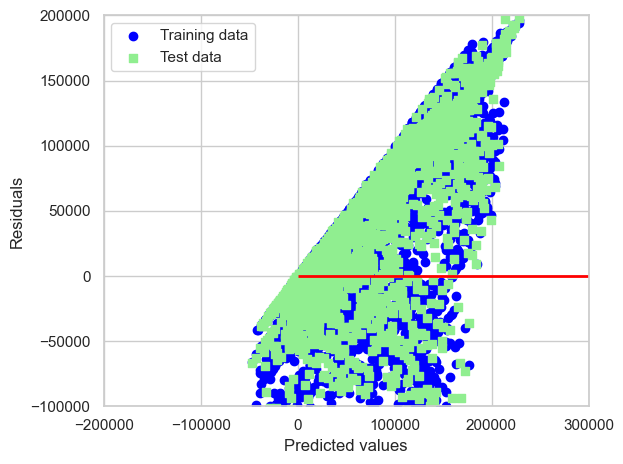

In [116]:
# Display the graph for the training and testing of the data
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -0, xmax = 500000, lw = 2, color = 'red')
plt.xlim([-200000, 300000])
plt.ylim([-100000, 200000])
plt.tight_layout()
#why not plotting?
# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [167]:
# Calculate the r2_score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Display the means squared error and r2 score values
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [9700, 3880]

# Lasso

In [168]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


In [119]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.13
Test set score: 0.15
Number of features used: 3


In [120]:
lasso00001 = Lasso(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.13
Test set score: 0.15
Number of features used: 3


## Ridge Regression

In [121]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.13
Test set score: 0.15


In [122]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 20).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.13
Test set score: 0.15


In [123]:
# alpha = 0.1 is a parameter using a fit() method
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.13
Test set score: 0.15


## ElasticNet

In [124]:
# Load library for the ElasticNet
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)

e_net.fit(X_train, y_train)

# Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)

# Calculate the mean_square_error
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)

# Display the mean square error
print("Mean Squared Error on test set", mean_squared_error)

Mean Squared Error on test set 27989946230.25022


In [125]:
print(e_net.coef_, e_net.intercept_)

[    0.         -5141.90068726  4301.97928693 -2638.00103571] -8421137.541212771


# Decision tree regression

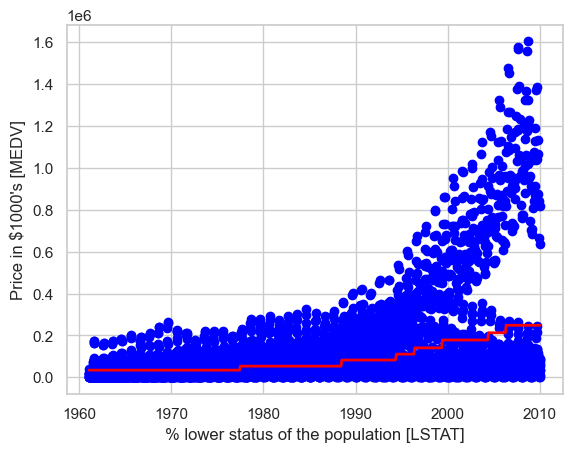

In [126]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

# Store the feature or attribute values in X and y
X = arriving_df_encoded[['decimal_year']].values
y = arriving_df_encoded['VALUE'].values

# Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

# Return a copy of the array collapsed into one dimension.
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
# plt.savefig('./figures/tree_regression.png', dpi = 300)
plt.show()

In [127]:
# Declaration of Varaibles
X = arriving_df_encoded.iloc[:, list(range(1, 3)) + list(range(4, 6))].values          # Store all columns into an array (X) except last column, 'MEDV'
y = arriving_df_encoded['VALUE'].values               # Store last column into an array (y)

# Use train_test_split method to split the data into 40% and 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [128]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion='squared_error',  # Change 'mse' to 'squared_error'
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.995, test: 0.967


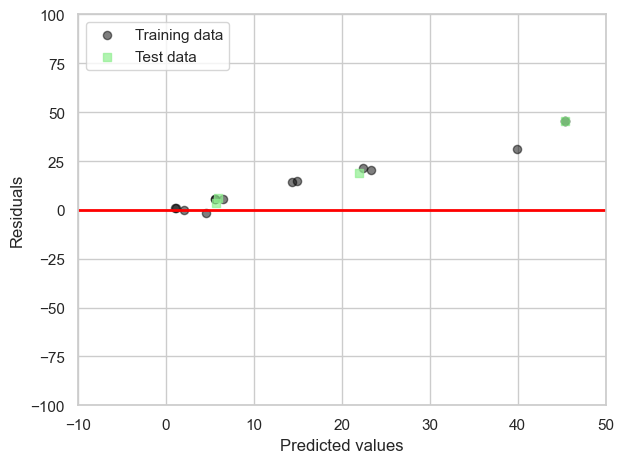

In [129]:
# Draw a scatter plot
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c = 'black', 
            marker = 'o', 
            s = 35,
            alpha = 0.5,
            label = 'Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c = 'lightgreen', 
            marker = 's', 
            s = 35,
            alpha = 0.7,
            label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.ylim([-100, 100])

plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [130]:
# Linear regression for time series

0.11185348646855875 -0.06432703892762959


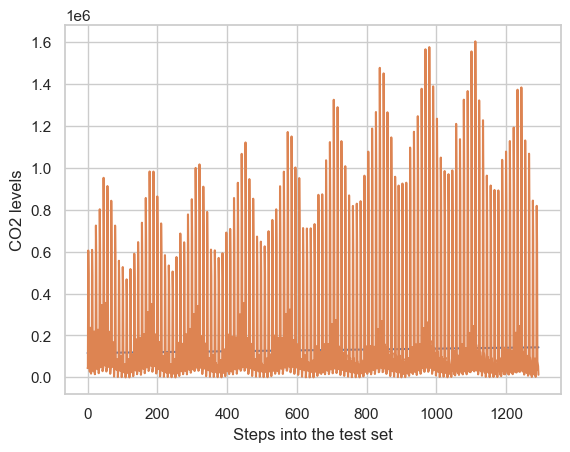

In [131]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create X and y objects
X = arriving_df_encoded[['decimal_year']]
y = arriving_df_encoded['VALUE']

# Create Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12345, shuffle = False)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Display the training and test score
print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()

In [132]:
arriving_df_encoded_2 = arriving_df_encoded.copy()
arriving_df_encoded_2['co2_l1'] = arriving_df_encoded['VALUE'].shift(1)
arriving_df_encoded_2['co2_l2'] = arriving_df_encoded['VALUE'].shift(2)
arriving_df_encoded_2['co2_l3'] = arriving_df_encoded['VALUE'].shift(3)
arriving_df_encoded_2['co2_l4'] = arriving_df_encoded['VALUE'].shift(4)
arriving_df_encoded_2['co2_l5'] = arriving_df_encoded['VALUE'].shift(5)

In [133]:
arriving_df_encoded_2.head()

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season,co2_l1,co2_l2,co2_l3,co2_l4,co2_l5
0,0,0,8,20102.0,1961.083333,3,NaN,NaN,NaN,NaN,NaN
1,0,0,10,19963.0,1961.083333,3,20102.0,NaN,NaN,NaN,NaN
2,0,0,9,139.0,1961.083333,3,19963.0,20102.0,NaN,NaN,NaN
3,0,0,1,10344.0,1961.083333,3,139.0,19963.0,20102.0,NaN,NaN
4,0,0,0,40063.0,1961.083333,3,10344.0,139.0,19963.0,20102.0,NaN


In [134]:
arriving_df_encoded_2 = arriving_df_encoded_2.dropna()

0.4613249104917374 0.15693102335275277


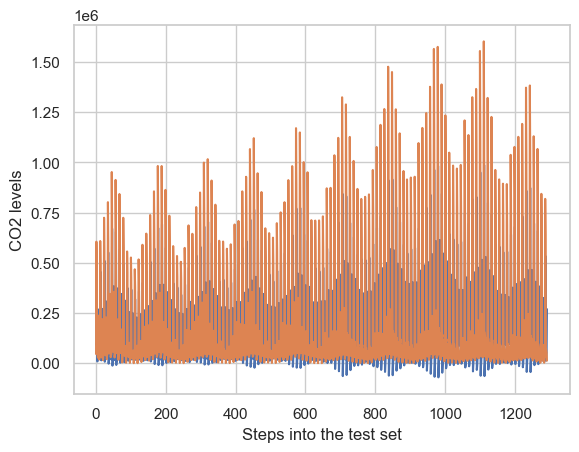

In [135]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create X and y objects
X = arriving_df_encoded_2[['decimal_year', 'co2_l1', 'co2_l2', 'co2_l3', 'co2_l4', 'co2_l5']]
y = arriving_df_encoded_2['VALUE']

# Create Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12345, shuffle = False)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Display the training and test score
print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()

# Tut 4

In [136]:
passenger_movement_df_encoded = encode(passenger_movement_df) 
passenger_movement_df_encoded.iloc[:, :]

,Year,Direction,Type of Passenger Movement,VALUE,decimal_year,Season
0,196101.0,0,8,20102.0,1961.083333,3
1,196101.0,0,10,19963.0,1961.083333,3
2,196101.0,0,9,139.0,1961.083333,3
3,196101.0,0,1,10344.0,1961.083333,3
4,196101.0,0,0,40063.0,1961.083333,3
...,...,...,...,...,...,...
12931,200912.0,1,4,664962.0,2010.000000,3
12932,200912.0,1,3,76086.0,2010.000000,3
12933,200912.0,1,5,61229.0,2010.000000,3
12934,200912.0,1,6,50767.0,2010.000000,3


In [137]:
passenger_movement_air_df = passenger_movement_df[passenger_movement_df['Type of Passenger Movement'].isin(['Summer'])]
passenger_movement_summer_df_encoded = encode(passenger_movement_summer_df)
y = passenger_movement_summer_df_encoded['Direction'].values
X = passenger_movement_summer_df_encoded.iloc[:, 2:5].values 

NameError: name 'passenger_movement_summer_df' is not defined

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 82)

# Display the rows and coulmns of X, y, X_train, y_train, X_test, y_test
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler

# Create and initialise an object sc by calling a method StandardScaler()
sc = StandardScaler() #rescaling data

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transforms the test data
X_test = sc.transform(X_test) #independent variable 

In [ ]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create and initialise an object sc by calling a method GaussianNB()
nvclassifier = GaussianNB()

# Train the model by calling a method fit()
nvclassifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

In [ ]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test, y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10, :]

In [ ]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

In [ ]:
from sklearn.model_selection import cross_val_score
nvclassifier = GaussianNB()
cross_val_score(nvclassifier, X, y, scoring='accuracy', cv = 20).mean()
#gives authenticity - can be used on all models

In [ ]:
#Bayes multivariable

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# from sklearn.model_selection import cross_val_score
# gnb = GaussianNB()
# cross_val_scor(gnb, wine.data, wine.target, scoring='accuracy', cv=30).mean()


# Support Vector Machines

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler